# Nigerian Music scraped from Spotify - an analysis

Start where we finished in the last lesson, with data imported and filtered.

In [75]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics


# import urllib
# import json
# import ssl
# import rdflib
# from owlrl import DeductiveClosure, OWLRL_Extension
# from ipywidgets import interact, interactive, fixed
# import pickle
# import os
# import gzip
# from IPython.display import clear_output
# from PIL import Image
# import torch
# from scipy.optimize import fmin_l_bfgs_b

# import torchtext
# from tfcv import *#
# from pyknow import * #pip install git+https://github.com/buguroo/pyknow/
# pip install torch torchvision
# from tqdm import tqdm#
# import cv2
# from skimage.io import imread
# from torchnlp import *
# import torchtext
# from torchnlp import *
# pip install --quiet tensorflow_datasets==4.4.0
# !cd ~ && wget -q -O - https://mslearntensorflowlp.blob.core.windows.net/data/tfds-ag-news.tgz | tar xz
# from transformers import pipeline


df = pd.read_csv("../data/nigerian-songs.csv")
df.head()

ModuleNotFoundError: No module named 'torch'

We will focus only on 3 genres. Maybe we can get 3 clusters built!

<IPython.core.display.Javascript object>


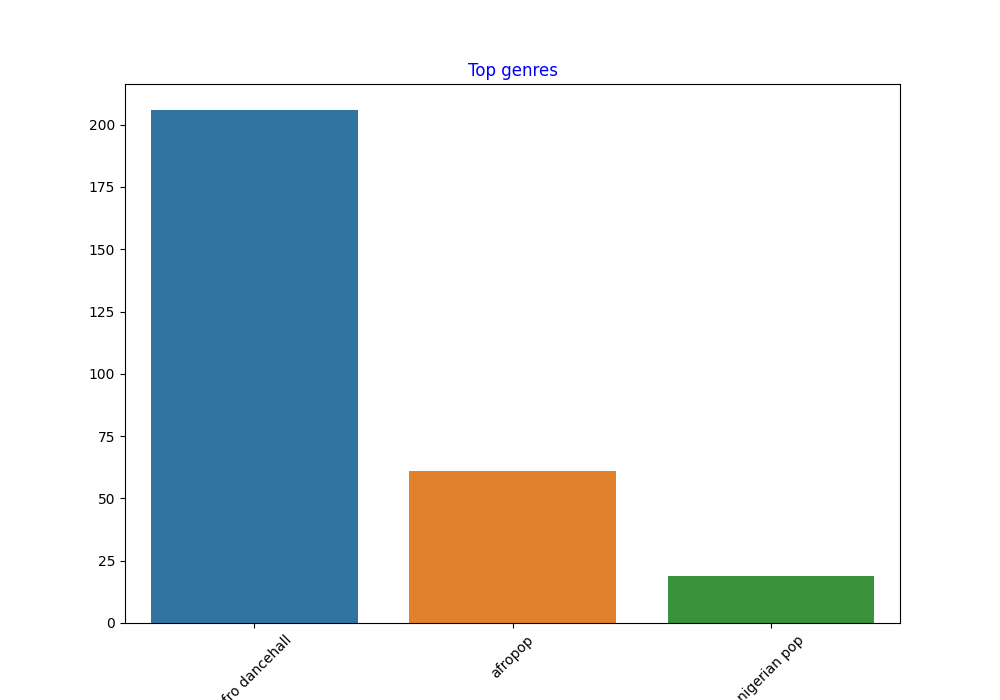

Text(0.5, 1.0, 'Top genres')

In [65]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [66]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


<IPython.core.display.Javascript object>


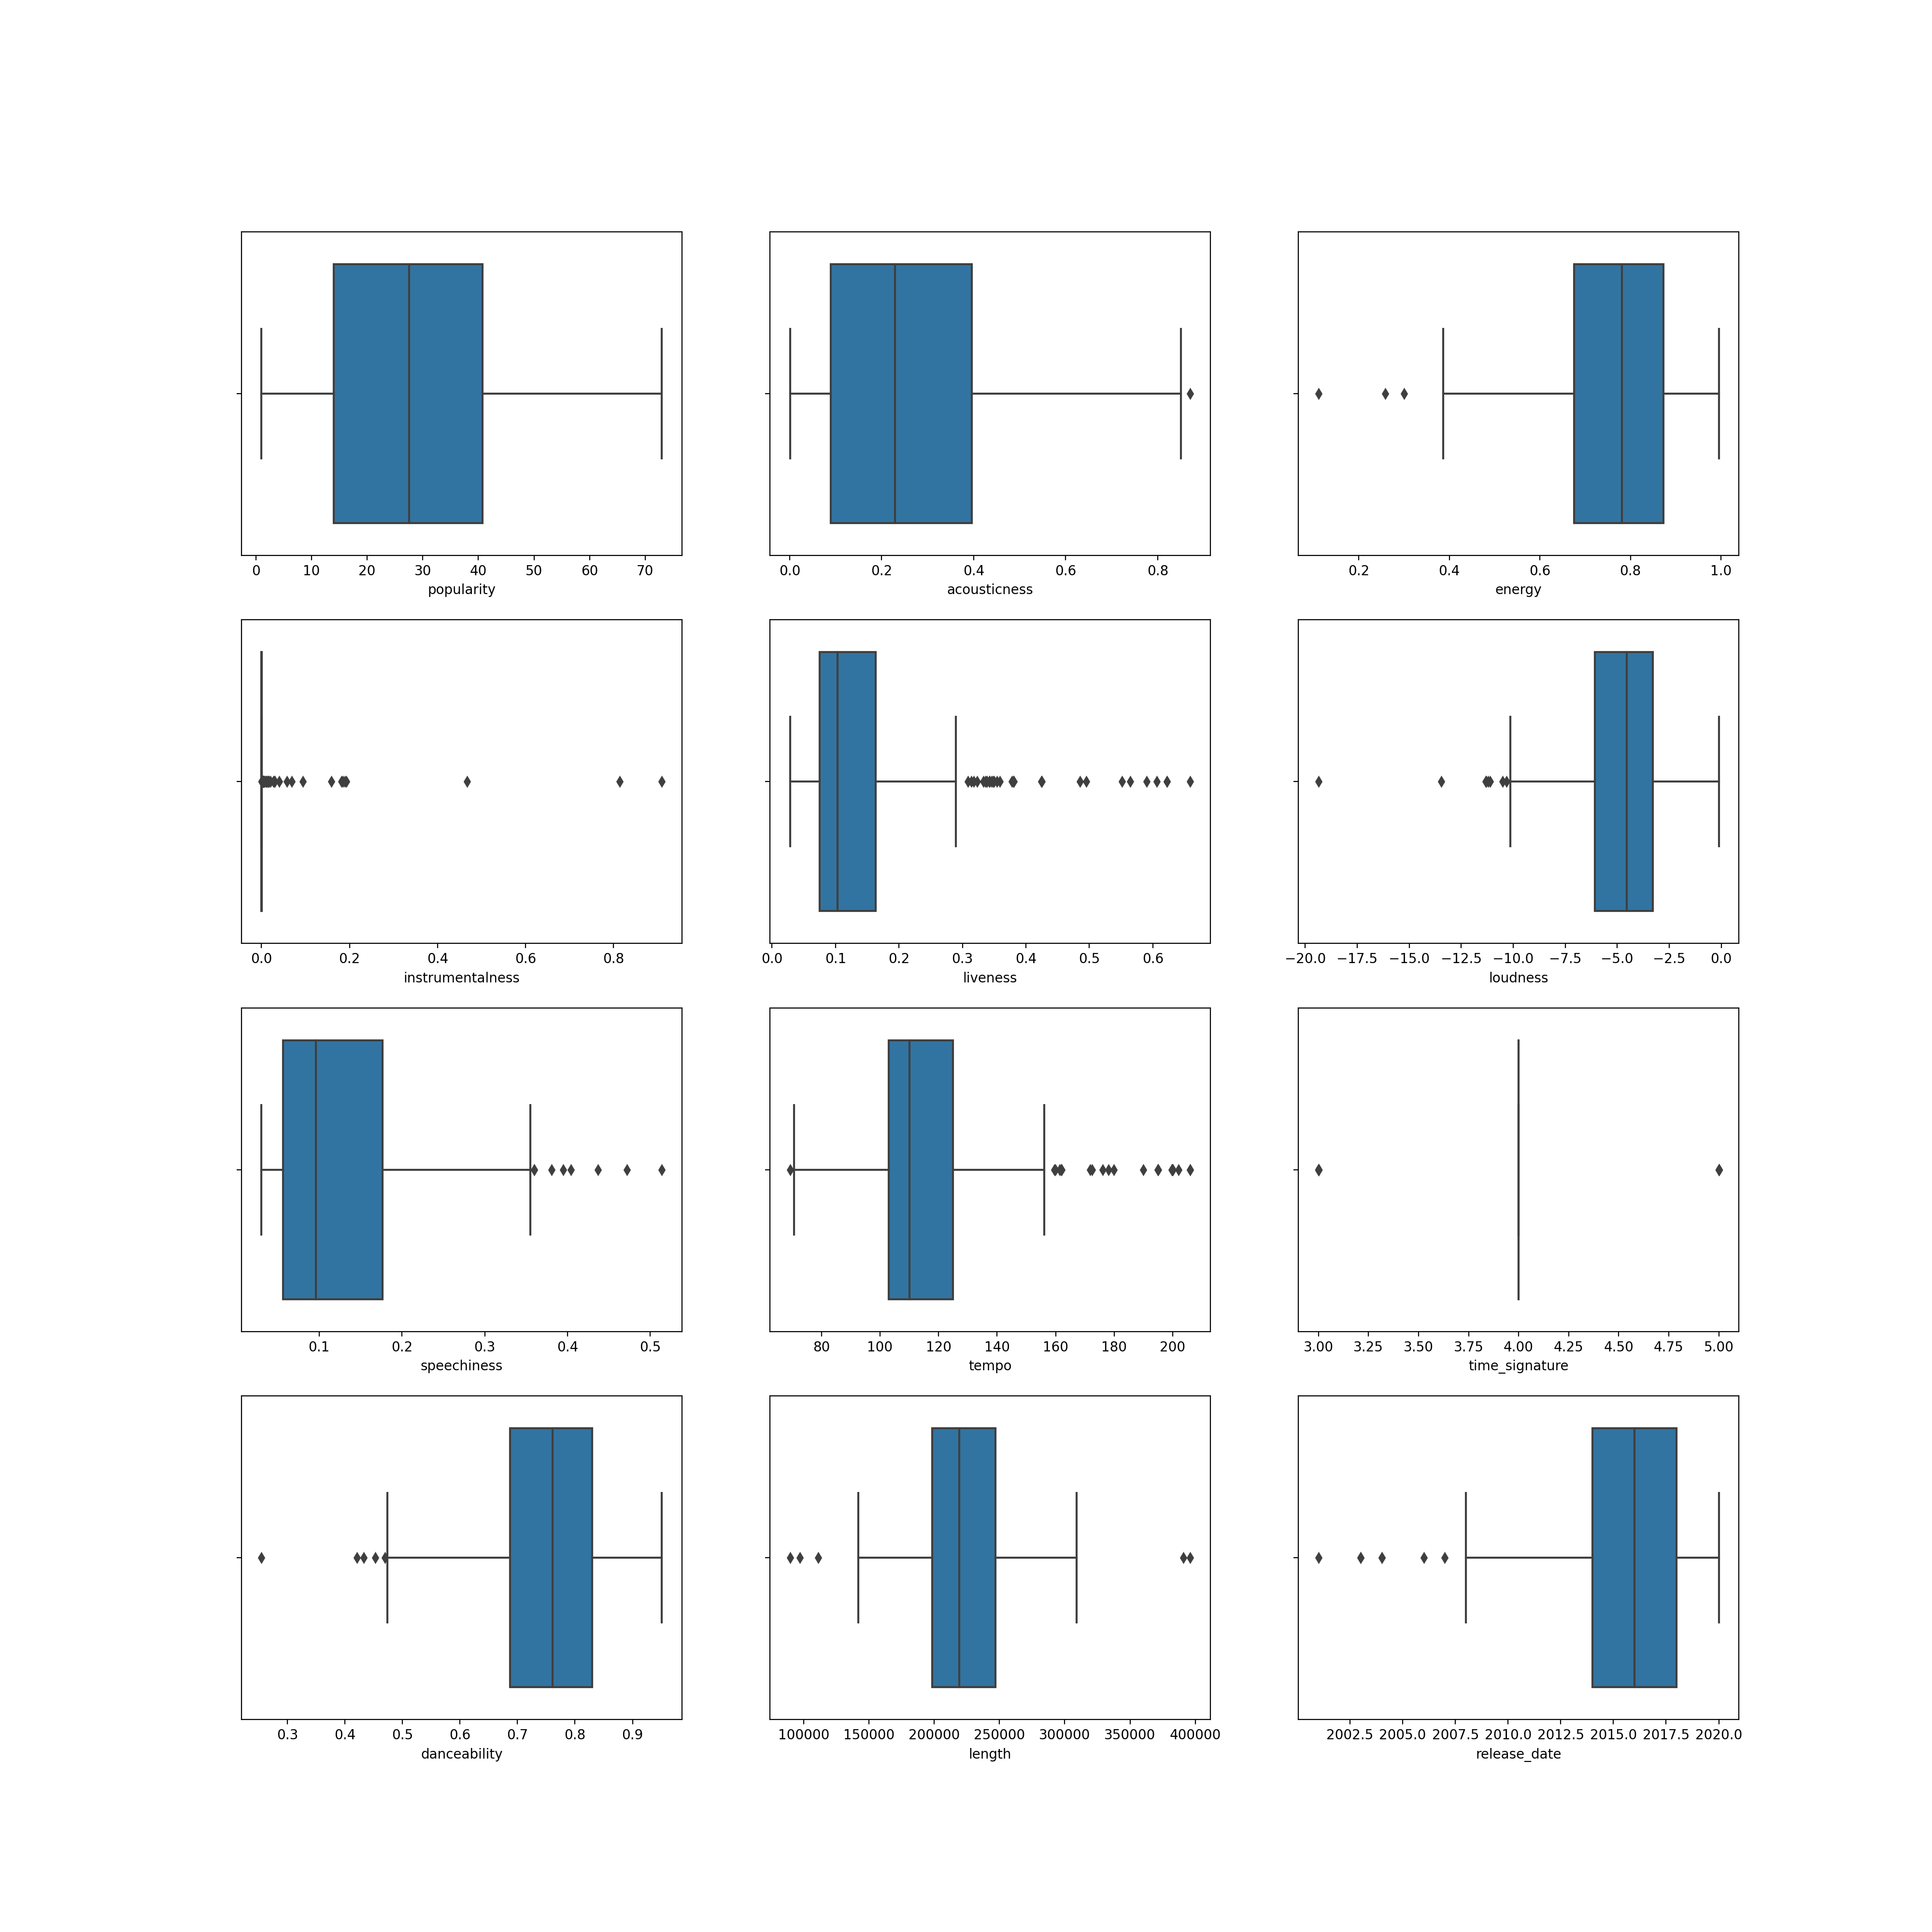

<AxesSubplot: xlabel='release_date'>

In [67]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

In [69]:


nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

/home/elimson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1],
      dtype=int32)

### Note des silhouettes
Ce score varie de -1 à 1

In [70]:

score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [71]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/home/elimson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/elimson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/elimson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/elimson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/elimson/.local/lib/pyt

### Méthode du coude
parce que vous avez ciblé 3 genres de chansons, vous devriez choisir 3 groupes. mais est-ce le cas?
Utilisez la wcssvariable que vous avez créée à l'étape précédente pour créer un graphique montrant où se trouve le "pli" dans le coude, ce qui indique le nombre optimal de clusters.

<IPython.core.display.Javascript object>


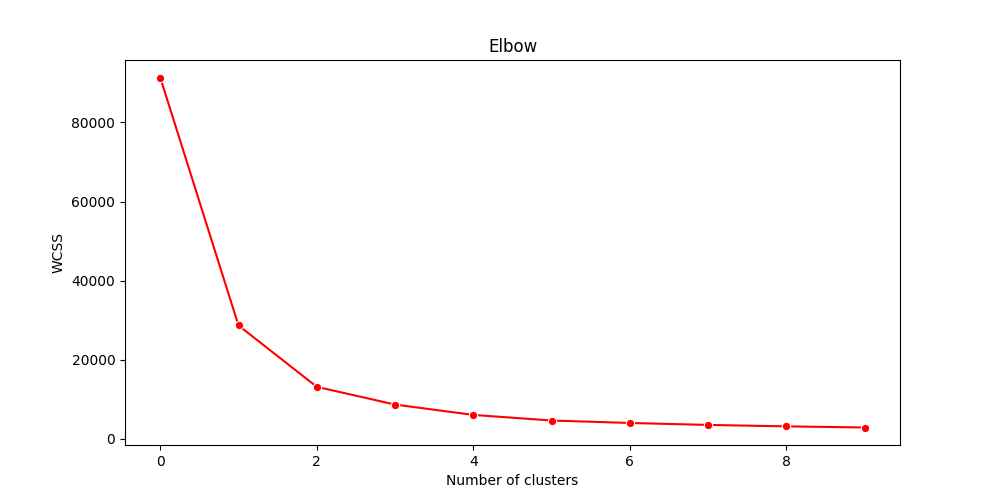

In [72]:
plt.figure(figsize=(10,5))
# sns.lineplot(range(1, 11), wcss,marker='o',color='red')
sns.lineplot(wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/home/elimson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>


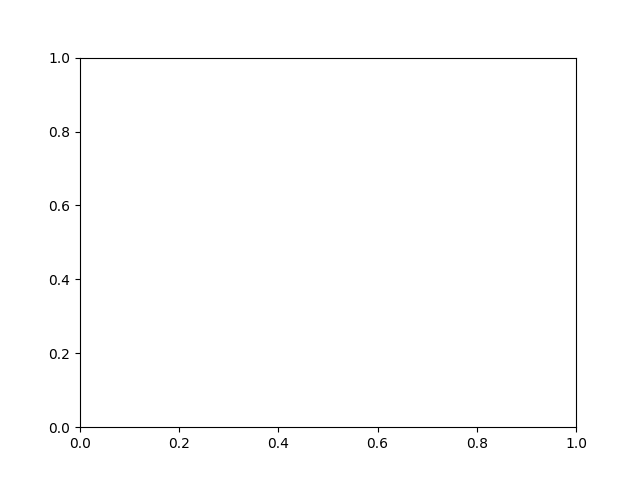

ValueError: 'c' argument has 286 elements, which is inconsistent with 'x' and 'y' with size 530.

In [63]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [73]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 27 out of 286 samples were correctly labeled.
Accuracy score: 0.09


In [ ]:
from textblob import TextBlob
from textblob.np_extractors import ConllExtractor
# import and create a Conll extractor to use later 
extractor = ConllExtractor()

# later when you need a noun phrase extractor:
user_input = input("> ")
user_input_blob = TextBlob(user_input, np_extractor=extractor)  # note non-default extractor specified
np = user_input_blob.noun_phrases  